In [1]:
import numpy as np
import scipy as sp
from scipy.signal import lfilter
import matplotlib.pyplot as plt

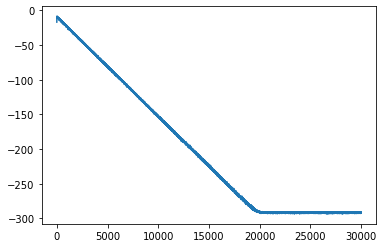

In [4]:
len = 30000
err = []
for iter in range(100):
    x = np.random.rand(len) - 0.5
    h = [-0.5, 0.1, 1, 0.1, -0.5]
    # h = sp.sparse.random(1, 12,)
    d = lfilter(h, 1, x)
    ncoef = 10
    x_tap = np.zeros(ncoef)
    w = np.zeros(ncoef)
    mu = 0.02
#     plt.plot(d)
    e = []
    for n in range (0, len):
        x_tap = np.concatenate(([x[n]], x_tap[:-1]))
        y = np.dot(w, x_tap)
        e.append(d[n] - y)
        w = w + mu*e[-1]*x_tap
#     plt.plot(e)
#     plt.show()
    err.append((np.square(e)))
# plt.plot(10*np.log10(np.mean(err, axis=1)))
plt.plot(10*np.log10(np.mean(err,axis=0)))

In [15]:
np.mean(err,axis=0)

array([1.86313460e-02, 1.93377319e-02, 1.00156635e-01, ...,
       3.83632277e-16, 4.60281455e-16, 4.37806844e-16])